# 1. Descripción del problema (Problema de seleccion)

Entrada: Conjunto $A$ de $n$ números diferentes, más un índice $i$.

Salida: Elemento $x\in A$, que es mayor a exactamente $i-1$ elementos de $A$ ($x$ corresponde al *estadístico de orden i-ésimo* para el conjunto $A$).

El problema que se busca resolver en este caso, corresponde al problema de selección, el cual consiste en encontrar al i-ésimo menor elemento del conjunto de entrada $A$. Para resolver este problema, se utilizará el algoritmo Select, el cual se encarga de buscar al i-ésimo menor elemento mediante un cálculo favorable del pivote a utilizar en cada llamada recursiva.

# 2. Select

El siguiente código muestra una implementación del algoritmo **Select**

## 2.1. Código

In [84]:
import random as rd
from termcolor import colored
import math as mt
import matplotlib.pyplot as plt
import copy
import datetime
from timeit import repeat
import statistics as st

In [85]:
def insertionSort(a, verbose=False):
    global comps
    if verbose: print("-----\nOrdenando arreglo...")
    for i in range(1, len(a)):
        if verbose: 
            print("\nIndice actual", i)
            if (i < len(a)-1): print(str(a[:i])[1:-1],",",colored(f"{str(a[i:i+1])[1:-1]}","red"),",",str(a[i+1:])[1:-1])
            else: print(str(a[:i])[1:-1],",",colored(f"{str(a[i:i+1])[1:-1]}","red"))

        pos = a[i] # Variable que guarda el indice a mover
        j = i-1

        while j >= 0 and pos < a[j]:
            if verbose: print("\nIndice anterior menor al actual.\nMoviendo posicion a indice", j)
            a[j+1] = a[j] # Se cambia el valor del indice actual por el anterior a este
            j -= 1 # Se baja un indice
            comps += 1
            if verbose: print(a)
        a[j+1] = pos # El indice previamente guardado se vuelve a introducir al arreglo

        if verbose: 
            print("\nDespues de la pasada:")
            print(a)
            print("\n")
    if verbose:
        print("Comparaciones =", comps)
    return a


In [86]:
def partition(a, low, high, pivote, verbose = False):
  global comps
  # Movemos el pivote recibido de pivotSelection al final para trabajar con el
  for i in range(low, high):
    if (a[i] == pivote):
      a[high], a[i] = a[i], a[high]
      break
  piv = a[high] # Pivote al final
  i = low - 1
  if verbose:
      print("Pivote a la derecha")
      print("Arreglo:",(colored(f"{str(a[low:high+1])}","blue")))
  for j in range(low, high):
      if verbose:
        print("Pivote:", (colored(f"{str(piv)}","green")))
        print("Numero comparado con el pivote: ",(colored(f"{str(a[j])}","red")))
      comps += 1
      if a[j] <= piv: # Comparacion entre el pivote y numero actual
          if verbose:
            print("Numero menor al pivote, intercambiando...")
          i += 1
          a[i], a[j] = a[j], a[i] # Se intercambian los valores
      else: 
          if verbose:
            print("Numero mayor o igual al pivote, no hay cambio.")
  i += 1
  a[i], a[high] = a[high], a[i] # Se cambia el pivote con la posicion i
  return i

In [87]:
def pivotSelection(A, l, h, verbose):
  subdivision = [A[i:i + 5] for i in range(0, len(A), 5)] # Subdividimos el arreglo en n/5 arreglos de 5 elementos cada uno
  if verbose:
    print(f"Arreglos Subdivididos: {subdivision}")
  medianas = [insertionSort(lista, verbose)[len(lista)//2] for lista in subdivision] # Ordenamos cada lista en la subdivision con insertionSort, y sacamos sus medianas
  if verbose:
    print(f"Medianas obtenidas: {medianas}")
  if len(medianas) <= 5: # Si tenemos 5 medianas o menos, la mediana de medianas es la mitad del arreglo
    pivote = insertionSort(medianas, verbose)[len(medianas)//2]
  else: #En caso contrario, corremos recursivamente esta funcion
    pivote = pivotSelection(medianas, 0, len(medianas)//2, verbose)
  
  if verbose:
    print(f"Nuestro pivote obtenido via mediana de medianas es: [{pivote}]")
    print(f"Con nuestro pivote obtenido, podemos particionar {A[l:h+1]}")

  return partition(A, l, h, pivote, verbose) # Particionamos el arreglo

In [88]:
def select(A, l, h, k, verbose = False):
  # Solo se ejecutara si k es menor o igual a la cantidad de elementos del arreglo
  if (k > 0 and k <= h - l + 1):
    if verbose:
      print(f"Buscamos pivote para el arreglo: {A[l:h+1]}")
    q = pivotSelection(A, l, h, verbose) # Buscamos el pivote con el cual particionar el arreglo

    # Si el pivote es igual a k, retornamos dicho pivote
    if (q - l ==  k - 1):
      if verbose: print(f"k-esimo elemento encontrado = {A[q]}")
      return A[q]
    elif (q - l > k - 1): # Si es mayor, recorremos recursivamente el subarreglo izquierdo
      return select(A, l, q - 1, k, verbose)
    else: return select (A, q+1, h, k - q + l - 1, verbose) # Y si no, lo hacemos por el subarreglo derecho

In [89]:
comps = 0
n = rd.randint(6,10)
array = rd.sample(range(1,100), n)
k = rd.randint(1,n)
print("Arreglo original: ", array)
print("k = ", k)
elemento = select(array, 0, len(array) - 1, k)
print("k-esimo menor elemento del arreglo: ", elemento)
print("Comparaciones: ", comps)

Arreglo original:  [29, 52, 96, 25, 30, 68, 51]
k =  4
k-esimo menor elemento del arreglo:  51
Comparaciones:  20


## 2.2. Descripción del algoritmo

El algoritmo recibe como entrada un arreglo $A$ de $n$ elementos y la posición del elemento buscado y retorna dicho elemento.

Primero, la función ***select*** se encarga de:

1. Recibir el arreglo con el que se va a trabajar y los índices inicial y final.

2. Se llama a la función **pivotSelection** para encontrar el mejor pivote con el que particionar al arreglo.

3. Si la posición del pivote coincide con la del elemento buscado, este se retorna y se finaliza el algoritmo. En caso contrario, la función select continua recursivamente para seguir con la búsqueda hasta encontrar el elemento deseado.

Además, la función ***pivotSelection***:

1. Divide el arreglo de entrada en sub-arreglos de 5 elementos (es probable que el último sub-arreglo posea menos de 5 elementos).

2. Se ordena cada sub-arreglo con insertionSort.

3. Luego de ordenar los sub-arreglos, encuentra la mediana de cada uno y las almacena en un arreglo de medianas.

4. Se aplica pivotSelection recursivamente para encontrar la mediana del arreglo de medianas.

5. La mediana encontrada se utiliza como pivote, por lo que esta debe enviarse al final del arreglo para luego poder llamar a la función partition y retornar su resultado.

## 2.3 Ejemplo

Para demostrar el funcionamiento, trabajaremos con el siguiente arreglo. Buscaremos el menor elemento, es decir, $k = 1$.

$a = [14, 5, 4, 11, 19, 2, 23, 9, 7, 6, 10, 13, 8, 17, 3]$

Comenzaremos buscando la mejor partición con la que trabajar, primero dividimos el arreglo en $n/5$ subarreglos de cinco elementos cada uno. Tener en cuenta que si el arreglo no es de longitud multiplo de $5$, el último subarreglo tendrá menos de 5 elementos, en nuestro caso, si es de 5 elementos.

$[14, 5, 4, 11, 19]$ - $[2, 23, 9, 7, 6]$ - $[10, 13, 8, 17, 3]$

Después, ordenamos cada uno utilizando **insertionSort**:

$[4, 5, 11, 14, 19]$ - $[2, 6, 7, 9, 23]$ - $[3, 8, 10, 13, 17]$

Ahora, sacamos la mediana de cada subarreglo y las guardamos en el siguiente arreglo $m$:

$m = [11, 7, 10]$

Continuamos aplicando **pivotSelection** recursivamente con tal de encontrar la mediana de las medianas, contenida en el arreglo $m$. Por lo tanto, se ordena éste con **insertionSort** y buscamos su mediana:

$m = [7, 10, 11]$

Entonces, $10$ será nuestro pivote para particionar el arreglo $a$, que luego de haberse aplicado la función **partition** se verá así:

$a = [5, 4, 2, 9, 7, 6, 8, 3, 10, 14, 11, 19, 23, 10, 13, 17]$

Como estamos buscando el menor elemento, trabajaremos con el subarreglo de la izquierda, es decir:

$izq = [5, 4, 2, 9, 7, 6, 8, 3]$

Y ya que este es un algoritmo recursivo, aplicaremos nuevamente el procedimiento, pero sobre el arreglo $izq$. Así que, lo dividimos en subarreglos de $5$ elementos cada uno, pero como ahora la cantidad de elementos *no* es múltiplo de este número, tendremos un subarreglo con solo tres elementos.

$[5, 4, 2, 9, 7]$ - $[6, 8, 3]$

De nuevo ordenamos estos subarreglos, y buscamos sus medianas:

$[2, 4, 5, 7, 9]$ - $[3, 6, 8]$

$m = [5, 6]$

Hacemos **pivotSelection** en $m$, y tenemos que nuestra mediana de medianas será $3$, por lo que este será nuestro pivote para particionar el arreglo $L$:

$izq = [4, 2, 3, 5, 7, 6, 9, 8]$

Continuamos con el subarreglo izquierdo, que contiene los valores menores a $3$:

$izq = [4, 2, 3]$

Debido a que es un arreglo menor a $5$ elementos, solo hay que ordenarlo y obtener la mediana:

$izq = [2, 3, 4]$

La mediana es $3$, así que dividimos el arreglo una última vez en otros dos subarreglos:

$[2]$ - $[3, 4]$

Finalmente, como estábamos buscando el menor elemento del arreglo $a$, concluimos en que éste es $2$.

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [90]:
comps = 0
n = rd.randint(6,10)
array = rd.sample(range(1,100), n)
k = rd.randint(1,n)
print("Arreglo original: ", array)
print("k = ", k)
elemento = select(array, 0, len(array) - 1, k, verbose = True)
print("k-esimo menor elemento del arreglo: ", elemento)
print("Comparaciones: ", comps)

Arreglo original:  [85, 81, 31, 23, 98, 24, 63]
k =  1
Buscamos pivote para el arreglo: [85, 81, 31, 23, 98, 24, 63]
Arreglos Subdivididos: [[85, 81, 31, 23, 98], [24, 63]]
-----
Ordenando arreglo...

Indice actual 1
85 , 81 , 31, 23, 98

Indice anterior menor al actual.
Moviendo posicion a indice 0
[85, 85, 31, 23, 98]

Despues de la pasada:
[81, 85, 31, 23, 98]



Indice actual 2
81, 85 , 31 , 23, 98

Indice anterior menor al actual.
Moviendo posicion a indice 1
[81, 85, 85, 23, 98]

Indice anterior menor al actual.
Moviendo posicion a indice 0
[81, 81, 85, 23, 98]

Despues de la pasada:
[31, 81, 85, 23, 98]



Indice actual 3
31, 81, 85 , 23 , 98

Indice anterior menor al actual.
Moviendo posicion a indice 2
[31, 81, 85, 85, 98]

Indice anterior menor al actual.
Moviendo posicion a indice 1
[31, 81, 81, 85, 98]

Indice anterior menor al actual.
Moviendo posicion a indice 0
[31, 31, 81, 85, 98]

Despues de la pasada:
[23, 31, 81, 85, 98]



Indice actual 4
23, 31, 81, 85 , 98

Despue

# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*El **Select** tiene un tiempo de ejecución de $O(n)$ en el peor caso*

### **Prueba del Teorema**

Para comprobar si nuestro teorema es correcto, estableceremos que el peor caso es aquel en el cual nuestro pivote se acerca demasiado al comienzo o al final de nuestro arreglo. Podemos también encontrar nuestra ecuación bajo la cual trabajar considerando el costo de **insertionSort**, que al ser utilzado en arreglos de 5 o menos elementos, tiene tiempo de ejecución $O(n)$, y la mediana de medianas tiene un tiempo estimado de $O(\frac{n}{5})$.

Al mismo tiempo, debemos tener en cuenta sobre cuántos elementos estaremos trabajando por paso. Si consideramos $m$ la lista donde guardamos las medianas de cada subarreglo, dentro de esta lista la mitad de sus elementos son menores a la mediana de medianas, o en otras palabras, $\frac{n}{10}$ elementos. En cada uno, tendremos dos elementos menores a la mediana de medianas, teniendo entonces $\frac{3n}{10}$ menores y en el peor caso $\frac{7n}{10}$ elementos con los que nuestro algoritmo deberá trabajar.

Entonces, nuestra ecuación de recurrencia para el peor caso de **Select** se vería así:

> $T(n)= T\left(\frac{n}{5}\right)+T\left(\frac{7n}{10}\right) + O(n)$

Para resolver esta ecuación, utilizaremos inducción, de la siguiente forma:

>  $T(n) = \begin{cases}
  c  & n \le 1 \\
  T\left(\frac{n}{5}\right)+T\left(\frac{7n}{10}\right) + d \cdot n & n > 1
\end{cases}$

Utilizamos el siguiente teorema:
> $T(n) \le k \cdot n$, para  $n \ge n\lq$

> $T(n) = T\left(\frac{n}{5}\right)+T\left(\frac{7n}{10}\right) + d \cdot n$

##### **Caso base (n = 1)**

> $T(1) = c \le k \cdot 1 \rightarrow \therefore k \ge c$

##### **Inducción**

> $T(n) = T\left(\frac{n}{5}\right)+T\left(\frac{7n}{10}\right) + d \cdot n$


> $T(n) \le k \cdot \frac{n}{5} + k \cdot \frac{7n}{10} + d \cdot n$


> $T(n) \le k \cdot n$

> Por inducción:
> $T(n) \le k \cdot n$, para $n \ge 1$

> $\therefore T(n) = O(n)$

# 4. Correctitud

### **Teorema (Correctitud de Select)**

*El algoritmo **Select** recibe un arreglo: $[a_1',a_2',...,a_n']$ y un valor k, después retorna el $k$-ésimo menor elemento.

## Prueba del Teorema

Como el Select es un arreglo recursivo, podemos probar su correctitud utilizando inducción matemática. Recordamos que no debemos probar la correctitud del **pivotSelection**, ya que aunque sea una nueva función, en definitiva solo reutiliza algoritmos a los cuales ya le hemos probado su correctitud previamente, siendo estos **Partition** e **insertionSort**.

### **Hipótesis**

Select retorna el $k$-ésimo menor elemento de una secuencia de $n$ elementos.

##### **Caso base (n = 1)**

Cuando el arreglo es de longitud 1, Select retornará el único elemento presente en el arreglo ya que el pivote será este valor, y se debe cumplir $k \le n$, entonces $P(1)$ se cumple.

##### **Caso inductivo ($m < n$)**

Después de comprobar que $P(1)$ se cumple, verificaremos los casos en los cuales se divide el problema.
Al obtener el pivote, nuestro arreglo inicial se subdivide en dos subarreglos $[0, ..., q-1]$ y $[q+1, ..., n]$, con $q$ siendo el posible $k$-ésimo elemento buscado.

Sabiendo nosotros que el tamaño de los subarreglos será siempre $<n$, por inducción podemos afirmar que estos contendrán los elementos menores al pivote en el subarreglo izquierdo y los elementos mayores al pivote en el subarreglo derecho, los cuales ambos podrían tener el elemento buscado.

##### **Correctitud**

Como los previos dos pasos son correctos, podemos concluir que el teorema de correctitud es correcto para nuestro algoritmo **Select**.

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* Cantidad de comparaciones del peor caso calculadas matemáticamente
* Cantidad de comparaciones del mejor caso calculadas matemáticamente
* Cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,100]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números $n \in [1,100]$.

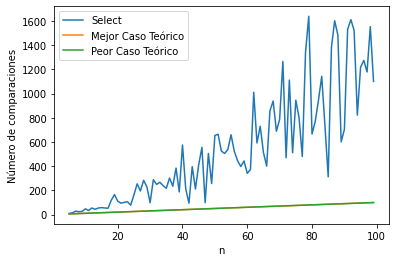

In [91]:
x = [n for n in range(5,100)] 
y1 = [n for n in range(5,100)] # mejor caso
y2 = [n for n in range(5,100)] # peor caso
y = []

for n in range(5,100):
  comps = 0
  a = rd.sample(range(1,100), n)
  k = rd.randint(1,n)
  elemento = select(a, 0, len(a) - 1, k)
  y.append(comps)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "Mejor Caso Teórico", "Peor Caso Teórico"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

### Análisis de resultados

En el gráfico, se observa que el algoritmo se comporta de una manera extrañamente inestable aunque mantiene una linearidad a medida de aumentar el número de comparaciones. Sabemos que el algoritmo funciona y está correctamente implementado, entonces esta inestabilidad puede provenir de distintos factores, como una posible recursividad extensa dentro de **pivotSelection**, o el uso de **insertionSort** como algoritmo de ordenamiento.

## 5.2. Tiempo de ejecución (Select vs R-Select)

En el siguiente gráfico se graficarán los tiempos de ejecución del algoritmo **Select** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños $n \in [5,500]$, y se compararán a los mismos tiempos del algoritmo **R-Select**, el cual posee un caso teórico de $O(n^2)$

# Código R-Select


In [92]:
def partition_end(A, p, r):
  pivot = A[r]
  i = p 
  for j in range(p,r): 
    if A[j] <= pivot:
      A[j], A[i] = A[i], A[j] 
      i+=1
  A[i], A[r] = A[r], A[i]
  return i

def randomizedPartition(A, p, r):
  i = rd.randint(p,r)
  A[r], A[i] = A[i], A[r]
  return partition_end(A, p, r)

def randomizedSelect(A, p, r, k):
  if p == r:
    return A[p]
  q = randomizedPartition(A, p, r)
  i = q - p + 1
  if (i == k):
    return A[q]
  elif k < i:
    return randomizedSelect(A, p, r-1, k)
  else:
    return randomizedSelect(A, q+1, r, k-i)

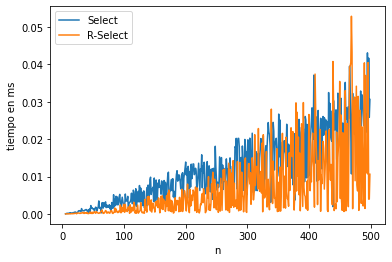

In [93]:
x, y, y2 = [], [], []

for n in range(5,500):

  a = rd.sample(range(1, 1000), n)
  k = rd.randint(1,n)
  t = repeat(setup="from __main__ import select", stmt=f"select({a},{0},{len(a)-1},{k})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import randomizedSelect", stmt = f"randomizedSelect({a},{0},{len(a)-1},{k})", repeat = 1, number = 10)
  x.append(n)
  y.append(t)
  y2.append(t2)

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["Select", "R-Select"])

plt.xlabel('n')
plt.ylabel('tiempo en ms')
plt.show()

### Análisis de resultados

Podemos ver en el gráfico que R-Select es generalmente más eficiente que Select en arreglos pequeños, pero al incrementar este tamaño, más inestable se va convirtiendo R-Select, aunque no se separa demasiado de Select. Esto se puede explicar con la selección aleartoria del pivote en R-Select, lo cual puede llevar a Partition a trabajar en su mejor o peor caso según la suerte que uno tenga con esta elección aleatoria de pivote.

Recordamos que los peaks de tiempo pueden ser debido al comportamiento errático de los procesadores o bajo cuanto uso está.